<a href="https://colab.research.google.com/github/trq11137/new-ML/blob/main/pregnancie_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [334]:
pip install featurewiz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [335]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



from sklearn.preprocessing import StandardScaler



from featurewiz import featurewiz
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model  import LinearRegression

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score

from sklearn import metrics


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import xgboost
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline





In [336]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [337]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pre1.csv") 

In [338]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Level
0,25,130,80,15.0,98.0,86,high
1,35,140,90,13.0,98.0,70,high
2,29,90,70,8.0,100.0,80,high
3,30,140,85,7.0,98.0,70,high
4,35,120,60,6.1,98.0,76,low


In [339]:
df['Level'].value_counts()


low      406
mid      336
high     272
Name: Level, dtype: int64

In [340]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [341]:
df.Level= le.fit_transform(df.Level.values)


In [342]:
df['Level'].unique()

array([0, 1, 2])

In [343]:
df.describe()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Level
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.063116
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.772146
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


In [344]:
df.groupby('Level').mean()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Level,,,,,,
0,36.216912,124.194853,85.073529,12.122610,98.899265,76.742647
1,26.869458,105.866995,72.534483,7.220271,98.368966,72.770936
2,28.363095,113.154762,74.232143,7.795744,98.833333,74.175595


In [345]:
# separating the data and labels
X = df.drop(columns = 'Level', axis=1)
y = df['Level']

In [346]:
print(X)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [347]:
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: Level, Length: 1014, dtype: int64


In [348]:
df.shape

(1014, 7)

svm

In [349]:
from sklearn.svm import SVC

#Create svm
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=0)
first = SVC(kernel='rbf', gamma=.10, C=1.0)
first.fit(X_train, y_train)

SVC(gamma=0.1)

In [350]:
print(X.shape, X_train.shape, X_test.shape)

(1014, 6) (811, 6) (203, 6)


In [351]:
print("Train accuracy:",first.score(X_train,y_train))
print("Test accuracy:",first.score(X_test,y_test))

Train accuracy: 0.8335388409371147
Test accuracy: 0.7635467980295566


In [352]:
y_pred = first.predict(X_test)
print(y_pred)

[1 0 1 2 1 1 1 0 2 1 0 1 2 1 0 1 0 0 2 1 1 1 2 2 1 1 1 1 0 2 2 1 1 1 2 1 2
 1 0 1 1 1 1 2 0 1 1 1 1 1 1 2 2 2 2 1 2 2 2 1 1 0 1 1 0 2 1 2 1 2 2 1 1 1
 1 1 2 2 1 0 2 0 1 1 1 1 1 2 0 0 0 2 1 2 2 1 2 0 1 2 2 1 1 1 1 0 0 0 0 0 1
 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 2 0 1 0 1 0 1 1 1 1 0 2 0 0 2 1 0
 0 1 1 0 2 0 1 2 1 1 0 0 2 1 1 1 0 1 0 1 1 1 2 0 2 2 1 1 1 1 1 2 1 2 0 1 1
 1 0 0 0 2 2 0 2 1 1 0 1 2 1 1 2 1 0]


In [353]:
cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)
print(f'Accuracy:',accuracy_score(y_test, y_pred)* 100 ,'%')

CM: [[43 10  2]
 [ 3 72  6]
 [ 5 22 40]]
Accuracy: 76.35467980295566 %


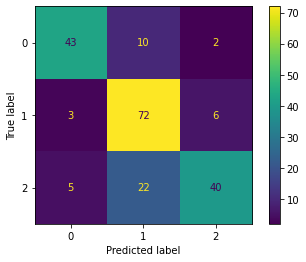

In [354]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [355]:
print(metrics.classification_report(y_test, first.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        55
           1       0.69      0.89      0.78        81
           2       0.83      0.60      0.70        67

    accuracy                           0.76       203
   macro avg       0.79      0.76      0.76       203
weighted avg       0.78      0.76      0.76       203



In [356]:
from sklearn import metrics 
#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.3399014778325123
mae= 0.270935960591133
rmse= 0.583010701301882


# **svm linear**

In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [358]:
#svm classifier
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [359]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)


In [360]:
#confusion matrix calculation
cm = confusion_matrix(X_test_prediction, y_test)
print(cm)

[[45  4 10]
 [ 5 64 27]
 [14 11 23]]


              precision    recall  f1-score   support

           0       0.70      0.76      0.73        59
           1       0.81      0.67      0.73        96
           2       0.38      0.48      0.43        48

    accuracy                           0.65       203
   macro avg       0.63      0.64      0.63       203
weighted avg       0.68      0.65      0.66       203



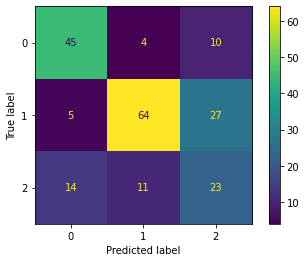

In [361]:
cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix
print(metrics.classification_report(X_test_prediction, y_test))

In [362]:
#accuracy score of training data
print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score of test data
print('Accuracy score of the test data : ', test_data_accuracy)



#import result of recall
recall=metrics.recall_score(X_test_prediction, y_test, average="macro")

#import result of precesion
pre=metrics.precision_score(X_test_prediction, y_test, average="macro")


#import result of f1
f1=metrics.f1_score(X_test_prediction, y_test, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)


Accuracy score of the training data :  0.6596794081381011
Accuracy score of the test data :  0.6502463054187192
recall= 0.6361817325800377
precision= 0.6321949718706047
f1= 0.6296872714758894


In [363]:
#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 1.2266009852216748
mae= 0.8719211822660099
rmse= 1.1075201963041914


# **XGBOOST**


In [364]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
from xgboost import XGBClassifier


In [365]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [367]:
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [368]:
y_pred = model.predict(X_test)


In [369]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[43  3  5]
 [ 1 61 12]
 [ 7 11 60]]


              precision    recall  f1-score   support

           0       0.84      0.84      0.84        51
           1       0.81      0.82      0.82        74
           2       0.78      0.77      0.77        78

    accuracy                           0.81       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.81      0.81       203



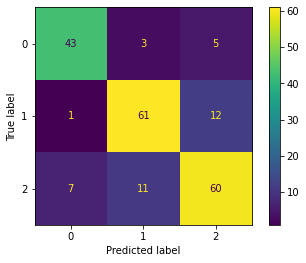

In [370]:
cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix
print(metrics.classification_report(y_pred, y_test))

In [371]:
print("Train accuracy:",model.score(X_train,y_train))
print("Test accuracy:",model.score(X_test,y_test))

Train accuracy: 0.9334155363748459
Test accuracy: 0.8078817733990148


In [372]:
#import result of recall
recall=metrics.recall_score(X_test_prediction, y_test, average="macro")

#import result of precesion
pre=metrics.precision_score(X_test_prediction, y_test, average="macro")


#import result of f1
f1=metrics.f1_score(X_test_prediction, y_test, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)

recall= 0.36252354048964214
precision= 0.3578371954842543
f1= 0.351057239057239


In [373]:
#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.3694581280788177
mae= 0.2512315270935961
rmse= 0.6078306738548308


ADAboost algorithm used

In [374]:
from sklearn.ensemble import AdaBoostClassifier


In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [376]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [377]:
model = abc.fit(X_train, y_train)

In [378]:
model.score(X_train, y_train)

0.6670776818742293

In [379]:
model.score(X_test, y_test)

0.6699507389162561

In [380]:
print("Train accuracy:",model.score(X_train,y_train))
print("Test accuracy:",model.score(X_test,y_test))

Train accuracy: 0.6670776818742293
Test accuracy: 0.6699507389162561


In [381]:
y_pred = model.predict(X_test)


In [382]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[36  1  8]
 [ 1 61 30]
 [14 13 39]]


              precision    recall  f1-score   support

           0       0.71      0.80      0.75        45
           1       0.81      0.66      0.73        92
           2       0.51      0.59      0.55        66

    accuracy                           0.67       203
   macro avg       0.68      0.68      0.68       203
weighted avg       0.69      0.67      0.67       203



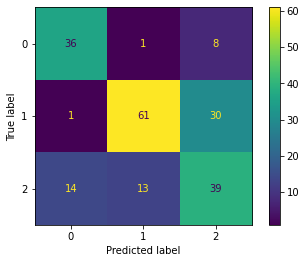

In [383]:
cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix
print(metrics.classification_report(y_pred, y_test))

In [384]:
#import result of recall
recall=metrics.recall_score(y_pred, y_test, average="macro")

#import result of precesion
pre=metrics.precision_score(y_pred, y_test, average="macro")


#import result of f1
f1=metrics.f1_score(y_pred, y_test, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)

recall= 0.6846508563899868
precision= 0.6752363975893387
f1= 0.6753311558700781


In [385]:
#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.6551724137931034
mae= 0.43842364532019706
rmse= 0.8094272134003795


GNB


In [386]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 53)

In [387]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [388]:
nb.score(X_train, y_train)

0.6195175438596491

In [389]:
nb.score(X_test, y_test)

0.5588235294117647

In [390]:
print("Train accuracy:",nb.score(X_train,y_train))
print("Test accuracy:",nb.score(X_test,y_test))

Train accuracy: 0.6195175438596491
Test accuracy: 0.5588235294117647


In [391]:
y_pred = nb.predict(X_test)


In [392]:
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[13  0  2]
 [ 3 39 30]
 [ 7  3  5]]


              precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.93      0.54      0.68        72
           2       0.14      0.33      0.19        15

    accuracy                           0.56       102
   macro avg       0.54      0.58      0.52       102
weighted avg       0.76      0.56      0.61       102



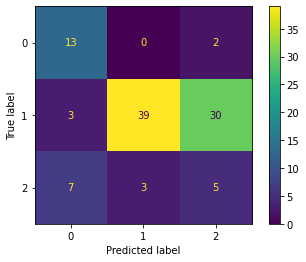

In [393]:
cm_display = ConfusionMatrixDisplay(cm).plot()
# all score of confusion matrix
print(metrics.classification_report(y_pred, y_test))

In [394]:
#import result of recall
recall=metrics.recall_score(y_pred, y_test, average="macro")

#import result of precesion
pre=metrics.precision_score(y_pred, y_test, average="macro")


#import result of f1
f1=metrics.f1_score(y_pred, y_test, average="macro")

print('recall=',recall)
print('precision=',pre)
print('f1=',f1)

recall= 0.5805555555555555
precision= 0.5429746516703039
f1= 0.520242914979757


In [395]:
#import result of mse
print("mse=",metrics.mean_squared_error(y_test, y_pred))

#import result of mae
print("mae=",metrics.mean_absolute_error(y_test, y_pred))

#import result of rmse
print("rmse=",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

mse= 0.7058823529411765
mae= 0.5294117647058824
rmse= 0.8401680504168059
